In [1]:
import librosa
import IPython.display as ipd
import librosa.display
from scipy.io import wavfile as wav

In [3]:
filename = "UrbanSound8K//audio//fold5//100263-2-0-117.wav"
data, sample_rate = librosa.load(filename)
print(sample_rate / 1000,'Kiloherz')

22.05 Kiloherz


<IPython.core.display.Javascript object>

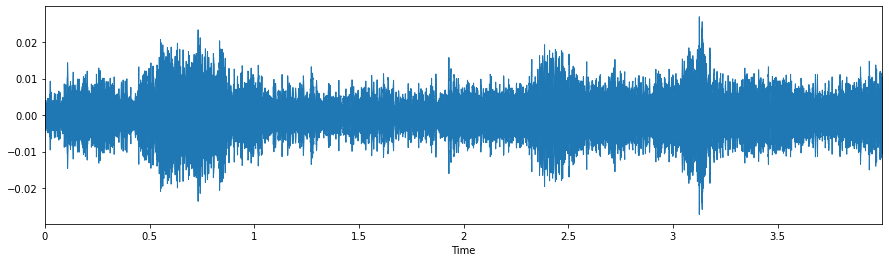

In [4]:
plt.figure(figsize = (15,4))
librosa.display.waveplot(data,sample_rate)
ipd.Audio(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

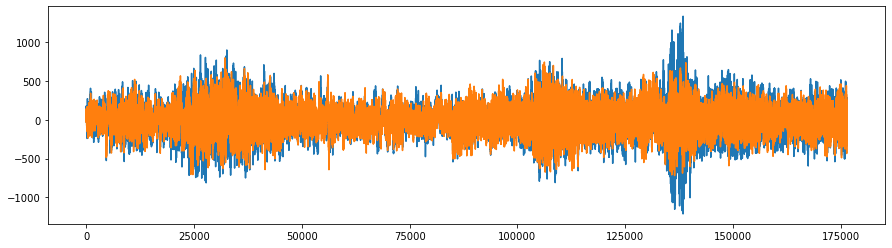

In [5]:
sample_rate1, data1 = wav.read(filename)
plt.figure(figsize = (15,4))
plt.plot(data1)
ipd.Audio(filename)

In [6]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

<IPython.core.display.Javascript object>

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

<AxesSubplot:>

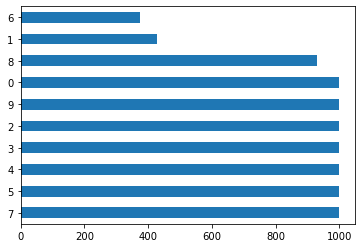

In [7]:
metadata.classID.value_counts().plot(kind = 'barh')

In [8]:
mfcc = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc= 4)

In [9]:
def extractfeatures(file):
    data, sample_rate = librosa.load(file)
    mfcc_feat = librosa.feature.mfcc(data,sample_rate, n_mfcc=40)
    scaled = np.mean(mfcc_feat.T,axis = 0)
    return scaled

In [10]:
from tqdm import tqdm
import os
path = 'UrbanSound8K/audio'
target = []
data = []

if not os.path.exists('Data.npy'):
    for num,row in tqdm(metadata.iterrows()):
        file = os.path.join(path,'fold'+str(row.fold),row.slice_file_name)
        extracted_features = extractfeatures(file)
        target.append(row.classID)
        data.append(extracted_features)

In [31]:
#target = np.array(pd.get_dummies(target))
#data = np.stack(data)

<IPython.core.display.Javascript object>

In [35]:
#np.save('Target', target)
#np.save('Data', data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
with open('Target.npy','rb') as targ, open('Data.npy','rb') as dat:
    data = np.load(dat)
    target = np.load(targ)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from sklearn.model_selection import train_test_split
X,x,Y,y = train_test_split(data,target,test_size = 0.2, random_state=0)

In [13]:
from keras.layers import Flatten, Dense, Dropout
import keras.backend as K

In [14]:
K.clear_session()
model = keras.models.Sequential()
model.add(Dense(100,input_shape= (40,) , activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation = 'softmax'))


<IPython.core.display.Javascript object>

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [16]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(X,Y, epochs=100, validation_data= (x,y))

Epoch 1/100
219/219 [==============================] - 1s 6ms/step - loss: 6.5345 - accuracy: 0.1311 - val_loss: 2.2762 - val_accuracy: 0.1185
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 2.3716 - accuracy: 0.1327 - val_loss: 2.2476 - val_accuracy: 0.1265
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 2.2767 - accuracy: 0.1387 - val_loss: 2.2151 - val_accuracy: 0.1517
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 2.2134 - accuracy: 0.1598 - val_loss: 2.1396 - val_accuracy: 0.2026
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 2.1627 - accuracy: 0.2106 - val_loss: 2.0659 - val_accuracy: 0.2765
Epoch 6/100
219/219 [==============================] - 1s 5ms/step - loss: 2.0993 - accuracy: 0.2248 - val_loss: 1.9471 - val_accuracy: 0.3057
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 2.0240 - accuracy: 0.2480 - val_loss: 1.8116 - val_accuracy: 0.3371

219/219 [==============================] - 1s 4ms/step - loss: 0.8190 - accuracy: 0.7228 - val_loss: 0.6492 - val_accuracy: 0.7911
Epoch 58/100
219/219 [==============================] - 1s 4ms/step - loss: 0.7820 - accuracy: 0.7433 - val_loss: 0.6606 - val_accuracy: 0.7888
Epoch 59/100
219/219 [==============================] - 1s 4ms/step - loss: 0.7712 - accuracy: 0.7393 - val_loss: 0.6519 - val_accuracy: 0.8025
Epoch 60/100
219/219 [==============================] - 1s 4ms/step - loss: 0.7790 - accuracy: 0.7406 - val_loss: 0.6373 - val_accuracy: 0.7922
Epoch 61/100
219/219 [==============================] - 1s 4ms/step - loss: 0.7726 - accuracy: 0.7426 - val_loss: 0.6294 - val_accuracy: 0.8019
Epoch 62/100
219/219 [==============================] - 1s 4ms/step - loss: 0.7704 - accuracy: 0.7450 - val_loss: 0.6326 - val_accuracy: 0.7997
Epoch 63/100
219/219 [==============================] - 1s 4ms/step - loss: 0.7597 - accuracy: 0.7440 - val_loss: 0.6321 - val_accuracy: 0.7956
Epoch

In [22]:
model.save('audio_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: audio_model\assets


In [23]:
model = keras.models.load_model('audio_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

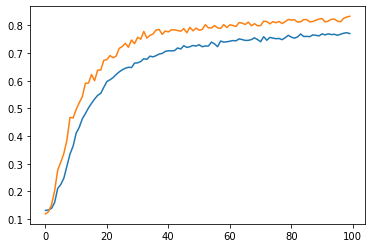

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [38]:
import random

for i in range(10):
    row = random.choice(range(len(metadata)))
    filename = os.path.join('UrbanSound8K/audio','fold' + str(metadata.iloc[row].fold),metadata.iloc[row].slice_file_name)
    print(metadata.iloc[row]['class'].upper())
    ipd.display(ipd.Audio(filename))
    features = extractfeatures(filename)
    prediction = np.argmax(model.predict(np.expand_dims(features, axis = 0)))
    print(f'Predicte Value: {prediction} ', f'Real value: {metadata.iloc[row].classID}','\n')
    if prediction != metadata.iloc[row].classID:
        print('Predicted as ',metadata[metadata.classID == prediction]['class'].iloc[0],'\n')

CAR_HORN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 1  Real value: 1 

DRILLING


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 4  Real value: 4 

CAR_HORN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 1  Real value: 1 

CHILDREN_PLAYING


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 2  Real value: 2 

CAR_HORN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 1  Real value: 1 

DOG_BARK


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 9  Real value: 3 

Predicted as  street_music 

DRILLING


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 4  Real value: 4 

SIREN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 8  Real value: 8 

JACKHAMMER


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 7  Real value: 7 

ENGINE_IDLING


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicte Value: 5  Real value: 5 

